In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.display.max_columns = None

In [3]:
data_test = pd.read_csv("./all/test.csv")
data = pd.read_csv("./all/train.csv")
data = pd.concat([data_test, data])

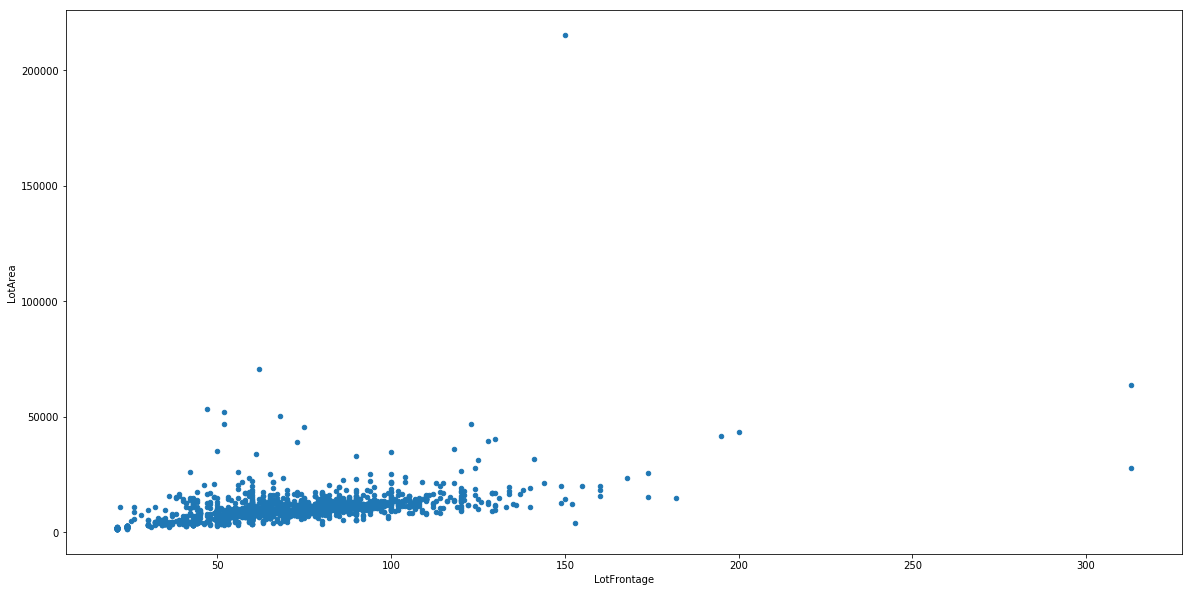

In [4]:
data[["LotFrontage", "LotArea"]].plot(x="LotFrontage", y="LotArea", kind='scatter', figsize=(20,10))

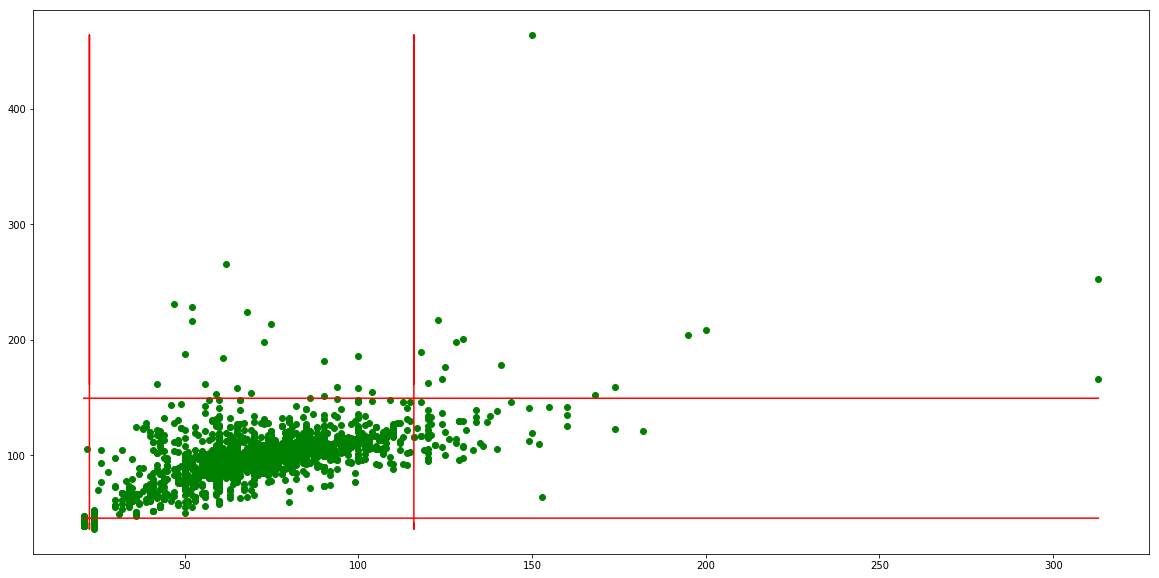

In [6]:
data = data.sort_values("LotFrontage")

data["sqrt_area"] = data["LotArea"] ** 0.5

lotfrontage_mean = data["LotFrontage"].mean()
lotfrontage_std = data["LotFrontage"].std()

sqrt_area_mean = data["sqrt_area"].mean()
sqrt_area_std = data["sqrt_area"].std()

plt.figure(figsize=(20,10))
plt.scatter(data["LotFrontage"], data["sqrt_area"], c='green')
plt.plot(data["LotFrontage"], [sqrt_area_mean + 2 * sqrt_area_std]*data["LotFrontage"].shape[0], c= "red")
plt.plot(data["LotFrontage"], [sqrt_area_mean - 2 * sqrt_area_std]*data["LotFrontage"].shape[0], c= "red")
plt.plot([lotfrontage_mean + 2 * lotfrontage_std]*data["LotFrontage"].shape[0], data["sqrt_area"], c= "red")
plt.plot([lotfrontage_mean - 2 * lotfrontage_std]*data["LotFrontage"].shape[0], data["sqrt_area"], c= "red")


In [144]:
model_data = data[["LotArea", "LotFrontage"]].dropna()
model_data = model_data[model_data["LotArea"] < lotarea_mean + 2 * lotarea_std]
model_data = model_data[model_data["LotFrontage"] > lotfrontage_mean - 2 * lotfrontage_std]
model_data = model_data[model_data["LotFrontage"] < lotfrontage_mean + 2 * lotfrontage_std]

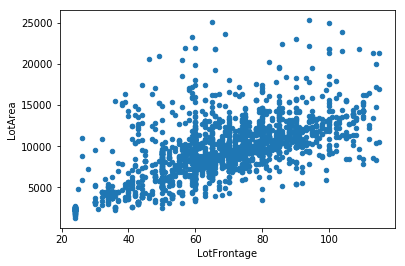

In [145]:
model_data.plot(x="LotFrontage", y="LotArea", kind='scatter')

In [146]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(model_data["LotArea"].values.reshape(-1,1), model_data["LotFrontage"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
model_data["front_pred"] = lr.predict(model_data["LotArea"].values.reshape(-1,1))
model_data.head()

,LotArea,LotFrontage,front_pred
1334,2368,24.0,45.072247
432,1920,24.0,43.595550
599,1950,24.0,43.694436
1182,2760,24.0,46.364357
39,2544,24.0,45.652378


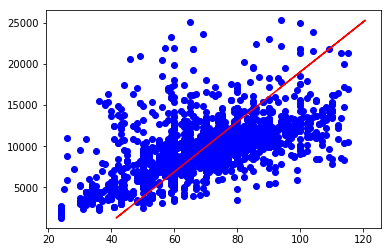

In [148]:

# model_data.sort_values("front_pred", ascending=False).head(20)
# plt.figure(figsize=(20,10))
plt.scatter(model_data["LotFrontage"], model_data["LotArea"], c="blue")
plt.plot(model_data["front_pred"], model_data["LotArea"] , c= "red")

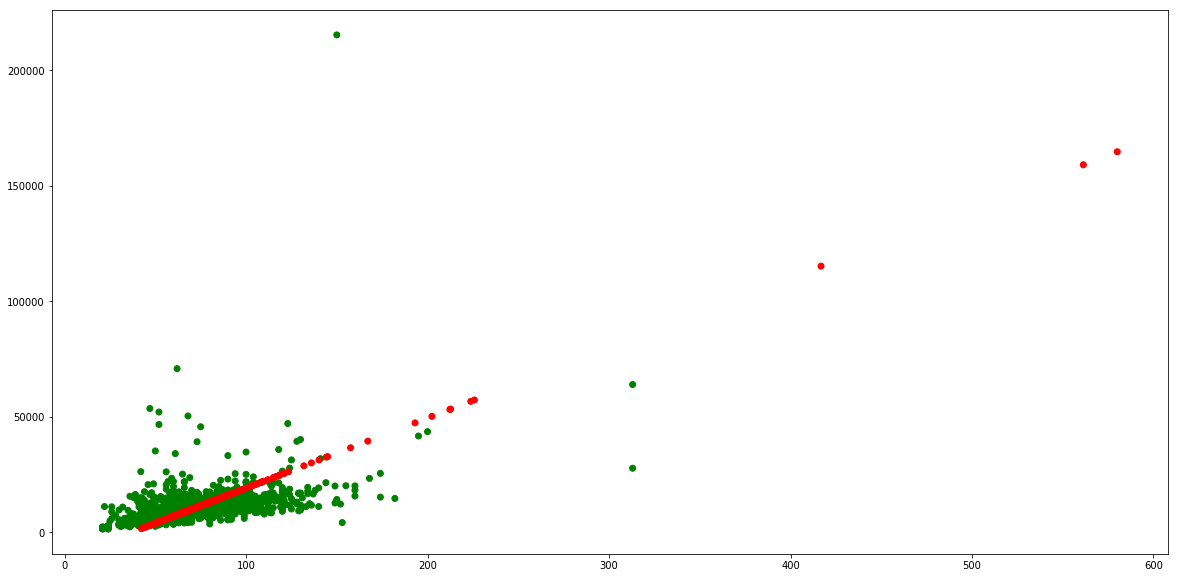

In [149]:
plot_data = data[["LotArea", "LotFrontage"]]
plot_data = plot_data.sort_values("LotFrontage")

plot_data["color"] = np.where(plot_data['LotFrontage'].isnull(), 'red', 'green')
# plot_data["color"] = np.where(data["LotArea"] >= lotarea_mean + (2 * lotarea_std), 'blue', plot_data["color"])

plot_data["front_pred"] = lr.predict(plot_data["LotArea"].values.reshape(-1,1))
plot_data["final_front"] = np.where(plot_data['LotFrontage'].isnull(), plot_data["front_pred"], plot_data["LotFrontage"])

plt.figure(figsize=(20,10))
plt.scatter(plot_data["final_front"], plot_data["LotArea"], c=plot_data["color"])
# plt.plot(plot_data["front_pred"], plot_data["LotArea"] , c= "red")

In [152]:
plot_data.sort_values("LotArea", ascending=False)

,LotArea,LotFrontage,color,front_pred,final_front
313,215245,150.0,green,746.757227,150.000000
335,164660,NaN,red,580.018995,580.018995
249,159000,NaN,red,561.362508,561.362508
706,115149,NaN,red,416.820880,416.820880
451,70761,62.0,green,270.509194,62.000000
1298,63887,313.0,green,247.851121,313.000000
1396,57200,NaN,red,225.809437,225.809437
790,56600,NaN,red,223.831718,223.831718
769,53504,47.0,green,213.626685,47.000000
457,53227,NaN,red,212.713638,212.713638
